In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in list(coordinates):
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

teya ru
khandyga ru
te anau nz
hobart au
lebu cl
barentsburg sj
port alfred za
upernavik gl
camacha pt
jamestown sh
qaanaaq gl
mahebourg mu
hermanus za
cururupu br
ossora ru
constitucion cl
thompson ca
new norfolk au
busselton au
jawhar so
kruisfontein za
phan thiet vn
zyryanka ru
teya ru
bambous virieux mu
tuatapere nz
manadhoo mv
busselton au
cape town za
tuktoyaktuk ca
torbay ca
lompoc us
bandarbeyla so
kismayo so
lazaro cardenas mx
taolanaro mg
malatya tr
vaini to
bredasdorp za
saskylakh ru
mataura pf
sinaloa mx
mataura pf
new norfolk au
vila vu
nalut ly
hambantota lk
atuona pf
butaritari ki
pacific grove us
castro cl
attawapiskat ca
antofagasta cl
cherskiy ru
rikitea pf
vaini to
iquique cl
puerto ayora ec
busselton au
mataura pf
kapaa us
meulaboh id
aklavik ca
aden ye
balkhash kz
butaritari ki
busselton au
ust-kamchatsk ru
atuona pf
ancud cl
hobart au
banka in
severo-kurilsk ru
tamandare br
mount isa au
atuona pf
iqaluit ca
hobart au
fairbanks us
hamilton bm
teahupoo pf
touros br


ushuaia ar
ribeira grande pt
mahebourg mu
ust-nera ru
rikitea pf
mataura pf
hamilton bm
busselton au
ushuaia ar
atuona pf
attawapiskat ca
dikson ru
butaritari ki
mataura pf
pevek ru
tiksi ru
thompson ca
hermanus za
lebu cl
upernavik gl
saskylakh ru
ambulu id
hobart au
albany au
husavik is
ushuaia ar
busselton au
rio grande br
tashtagol ru
komsomolskiy ru
provideniya ru
alofi nu
tarakan id
hermanus za
avarua ck
jasper ca
punta arenas cl
barentsburg sj
tuktoyaktuk ca
lompoc us
gizo sb
east london za
tuktoyaktuk ca
norman wells ca
esperance au
puerto ayora ec
attawapiskat ca
kurilsk ru
atuona pf
grand river south east mu
pacific grove us
avarua ck
albany au
vaini to
malanje ao
rikitea pf
taolanaro mg
rikitea pf
ayorou ne
ampanihy mg
klaksvik fo
punta arenas cl
sitka us
nikolskoye ru
san cristobal ec
bredasdorp za
victoria sc
wulanhaote cn
busselton au
abha sa
charters towers au
kavaratti in
iqaluit ca
mandera ke
maragogi br
bluff nz
east london za
bredasdorp za
vaini to
salalah om
port al

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b0d3d05c33c230bf1502027afc304656


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | teya
Processing Record 2 of Set 1 | khandyga
Processing Record 3 of Set 1 | te anau
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | camacha
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | cururupu
Processing Record 15 of Set 1 | ossora
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | jawhar
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | phan thiet
Processing Re

Processing Record 37 of Set 4 | saint-philippe
Processing Record 38 of Set 4 | broome
Processing Record 39 of Set 4 | patos
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | barrow
Processing Record 42 of Set 4 | hearst
Processing Record 43 of Set 4 | satitoa
City not found. Skipping...
Processing Record 44 of Set 4 | vostok
Processing Record 45 of Set 4 | caravelas
Processing Record 46 of Set 4 | ishioka
Processing Record 47 of Set 4 | same
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | tiksi
Processing Record 50 of Set 4 | bluff
Processing Record 1 of Set 5 | kavaratti
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | constantine
Processing Record 4 of Set 5 | pisco
Processing Record 5 of Set 5 | ambulu
Processing Record 6 of Set 5 | ilawa
Processing Record 7 of Set 5 | fortuna
Processing Record 8 of Set 5 | sonegaon
Processing Record 9 of Set 5 | esperance
Processing Record 10 of Set 5 | ko samui
Processing Record 1

Processing Record 26 of Set 8 | arica
Processing Record 27 of Set 8 | viedma
Processing Record 28 of Set 8 | larsnes
Processing Record 29 of Set 8 | hoshcha
Processing Record 30 of Set 8 | ust-nera
Processing Record 31 of Set 8 | rio grande
Processing Record 32 of Set 8 | tashtagol
Processing Record 33 of Set 8 | komsomolskiy
Processing Record 34 of Set 8 | alofi
Processing Record 35 of Set 8 | tarakan
Processing Record 36 of Set 8 | jasper
Processing Record 37 of Set 8 | gizo
Processing Record 38 of Set 8 | kurilsk
Processing Record 39 of Set 8 | malanje
Processing Record 40 of Set 8 | ayorou
Processing Record 41 of Set 8 | ampanihy
Processing Record 42 of Set 8 | victoria
Processing Record 43 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 44 of Set 8 | abha
Processing Record 45 of Set 8 | charters towers
Processing Record 46 of Set 8 | mandera
Processing Record 47 of Set 8 | maragogi
Processing Record 48 of Set 8 | salalah
Processing Record 49 of Set 8 | beloha
P

Processing Record 14 of Set 12 | santa rosa
Processing Record 15 of Set 12 | bronnoysund
Processing Record 16 of Set 12 | ketchikan
Processing Record 17 of Set 12 | cintalapa
Processing Record 18 of Set 12 | bilibino
Processing Record 19 of Set 12 | gamba
Processing Record 20 of Set 12 | chumikan
Processing Record 21 of Set 12 | muisne
Processing Record 22 of Set 12 | nago
Processing Record 23 of Set 12 | caruray
Processing Record 24 of Set 12 | koumac
Processing Record 25 of Set 12 | craig
Processing Record 26 of Set 12 | moranbah
Processing Record 27 of Set 12 | morro bay
Processing Record 28 of Set 12 | karasjok
Processing Record 29 of Set 12 | lyubech
Processing Record 30 of Set 12 | haibowan
City not found. Skipping...
Processing Record 31 of Set 12 | muravlenko
Processing Record 32 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 33 of Set 12 | weatherford
Processing Record 34 of Set 12 | bambanglipuro
Processing Record 35 of Set 12 | buckeye
Processing Recor

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Teya,RU,2021-03-09 21:51:52,60.3778,92.6267,13.19,93,99,9.04
1,Khandyga,RU,2021-03-09 21:51:53,62.6667,135.6000,-1.05,93,100,5.53
2,Te Anau,NZ,2021-03-09 21:51:53,-45.4167,167.7167,54.52,89,100,1.36
3,Hobart,AU,2021-03-09 21:51:54,-42.8794,147.3294,53.60,62,20,6.91
4,Lebu,CL,2021-03-09 21:51:54,-37.6167,-73.6500,63.16,73,100,2.19
5,Port Alfred,ZA,2021-03-09 21:47:11,-33.5906,26.8910,69.01,84,50,7.00
6,Upernavik,GL,2021-03-09 21:51:56,72.7868,-56.1549,11.14,85,100,1.61
7,Camacha,PT,2021-03-09 21:51:56,33.0833,-16.3333,59.00,63,40,11.50
8,Jamestown,US,2021-03-09 21:51:57,42.0970,-79.2353,48.20,46,1,1.41
9,Qaanaaq,GL,2021-03-09 21:51:57,77.4840,-69.3632,5.09,83,95,3.33


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

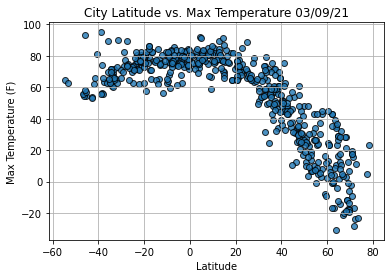

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

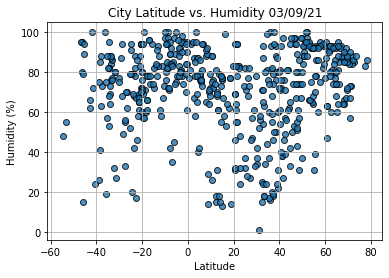

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

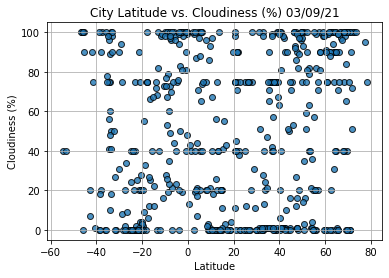

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

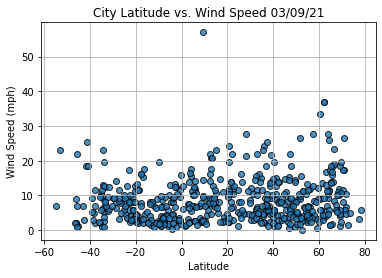

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()